In [1]:
# import all libraries here

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

import joblib

In [2]:
# loading the complete and abridged dataframes

df = joblib.load('../data/jlib_files/dataframes/modelling_df_1_cleaning.jlib')
df_vis = joblib.load('../data/jlib_files/dataframes/complete_df_1_cleaning.jlib')

To-Do List

EDA:

- median price comparison for other non-amenity categorical variables

- pairplots for continuous data (use less variables)
- timeseries visualisations - off-topic but could be interesting as a result of Covid impact on 2020

- change tfl_zone from int to object in data wrangling notebook

Variable Transformation:

- look at distributions of continuous/discrete variables - do they need transforming?
- look in to log transforming the continuous variables (naive-Bayes lessons)

Modelling:

- review the use of NLP - could we instead look at key words within the variables? This might be a better option for the title variable
- can we use neural networks?

good visualisations: https://towardsdatascience.com/predicting-airbnb-prices-with-deep-learning-part-2-how-to-improve-your-nightly-price-50ea8bc2bd29

# Exploratory Data Analysis

### Price

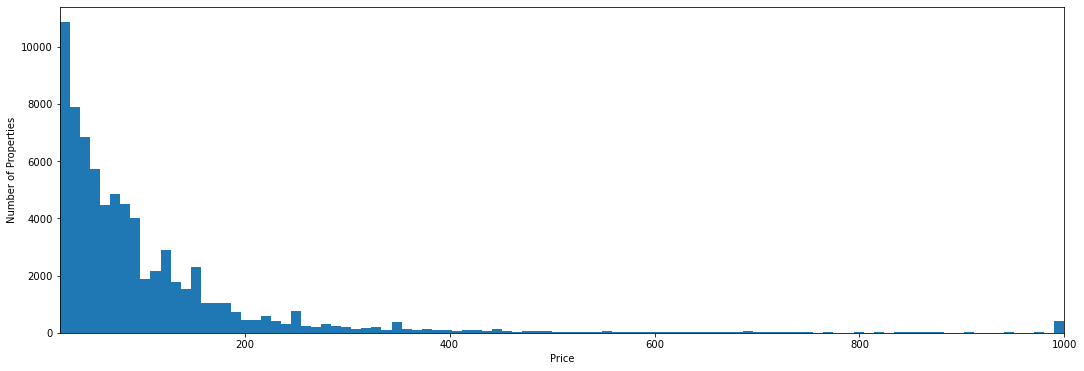

In [150]:
fig,ax = plt.subplots(figsize=(18,6))

ax.hist(df.price, bins=100)
ax.margins(x=0)
ax.set_xlabel('Price')
ax.set_ylabel('Number of Properties')

plt.show()

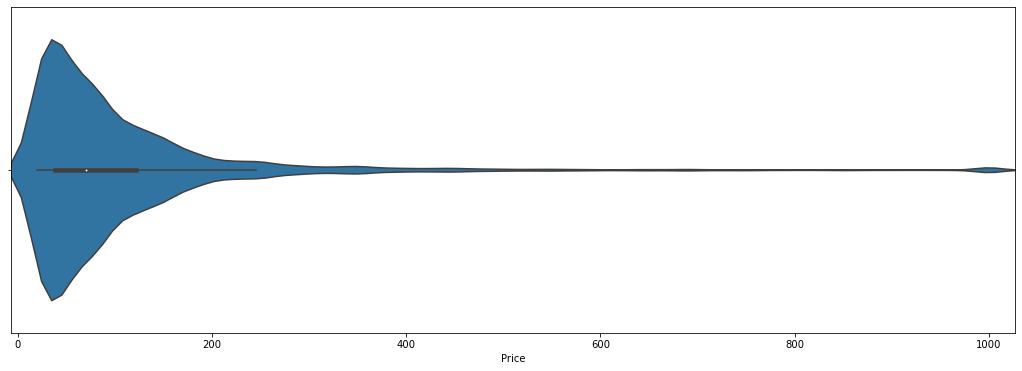

In [154]:
fig,ax = plt.subplots(figsize=(18,6))

sns.violinplot(x=df.price)

ax.margins(x=0)
ax.set_xlabel('Price')

plt.show()

### Histogram distributions of quantitative variables 

In [4]:
describe_variables = ['accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'calculated_host_listings_count',
                     'distance_from_center', 'station_distance', 'mean_monthly_rent', 'name_length',
                     'description_length', 'neighborhood_overview_length', 'host_about_length']

df[describe_variables].describe().T

count         mean         std         min  \
accommodates                    73364.0     3.002522    1.916181    1.000000   
bathrooms                       73364.0     1.306901    0.606317    0.500000   
bedrooms                        73364.0     1.015362    0.170620    1.000000   
beds                            73364.0     1.712093    1.228469    1.000000   
price                           73364.0   105.941143  126.989944   20.000000   
calculated_host_listings_count  73364.0    28.106128  111.625202    1.000000   
distance_from_center            73364.0     7.241909    4.493219    0.017436   
station_distance                73364.0     0.725411    0.919740    0.001587   
mean_monthly_rent               73364.0  1471.515909  311.658425  859.000000   
name_length                     73364.0     6.466073    2.029768    0.000000   
description_length              73364.0   111.068440   55.795207    0.000000   
neighborhood_overview_length    73364.0    41.972153   52.722784    0.000000   
host_about_length               73364.0    34.135707   60.680338    0.000000   

                                        25%          50%          75%  \
accommodates                       2.000000     2.000000     4.000000   
bathrooms                          1.000000     1.000000     1.500000   
bedrooms                           1.000000     1.000000     1.000000   
beds                               1.000000     1.000000     2.000000   
price                             39.000000    70.000000   122.000000   
calculated_host_listings_count     1.000000     1.000000     4.000000   
distance_from_center               4.148304     6.086199     9.455120   
station_distance                   0.290835     0.470464     0.768426   
mean_monthly_rent               1282.000000  1461.000000  1633.000000   
name_length                        5.000000     7.000000     8.000000   
description_length                66.000000   124.000000   162.000000   
neighborhood_overview_length       0.000000    20.000000    67.000000   
host_about_length                  0.000000     5.000000    44.000000   

                                        max  
accommodates                      16.000000  
bathrooms                         18.000000  
bedrooms                          16.000000  
beds                              38.000000  
price                           1000.000000  
calculated_host_listings_count   861.000000  
distance_from_center              29.311408  
station_distance                  11.349528  
mean_monthly_rent               2611.000000  
name_length                       45.000000  
description_length               217.000000  
neighborhood_overview_length     200.000000  
host_about_length               2002.000000

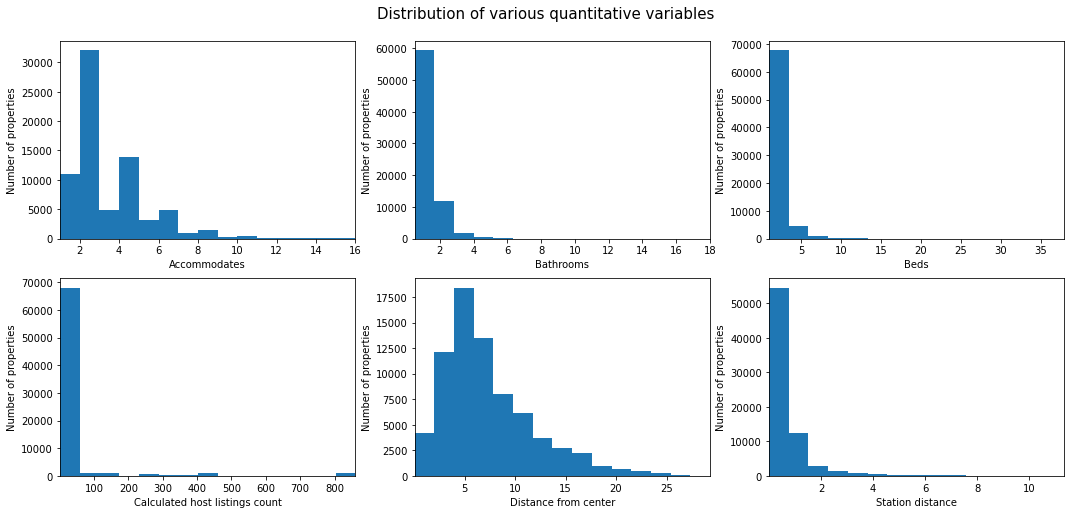

In [5]:
quantitative_variables = ['accommodates', 'bathrooms', 'beds', 'calculated_host_listings_count',
                         'distance_from_center', 'station_distance']

fig,ax = plt.subplots(2, 3, figsize=(18,8))

counter = 0

for r in range(2):
    for c in range(3):
        
        column = quantitative_variables[counter]
        title = column.replace('_',' ').capitalize()
        
        ax[r,c].hist(df[column], bins=15)
        
        ax[r,c].set_xlabel(title)
        ax[r,c].set_ylabel('Number of properties')
        ax[r,c].margins(x=0)
        
        counter += 1

plt.suptitle('Distribution of various quantitative variables', y=0.94, size=15)
plt.show()

- horizontal histograms showing difference in price between room types and property types

additions - colour the bars differently to differentiate

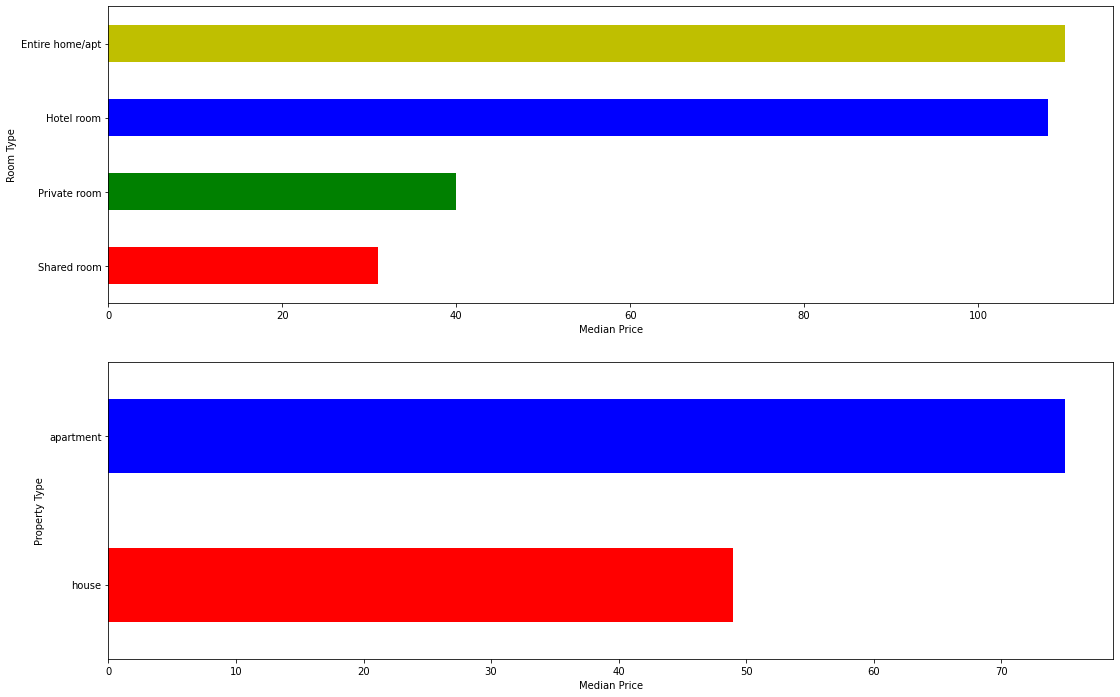

In [7]:
fig,ax = plt.subplots(2, figsize = (18,12))

df_vis.groupby('room_type').median()['price'].sort_values().plot.barh(ax=ax[0], ylabel='Room Type',
                                                                      color = ['r','g','b','y'])
df_vis.groupby('property_type_basic').median()['price'].sort_values().plot.barh(ax=ax[1], ylabel='Property Type',
                                                                               color = ['r', 'b'])

ax[0].set_ylabel('Room Type')
ax[1].set_ylabel('Property Type')

ax[0].set_xlabel('Median Price')
ax[1].set_xlabel('Median Price')

plt.show()

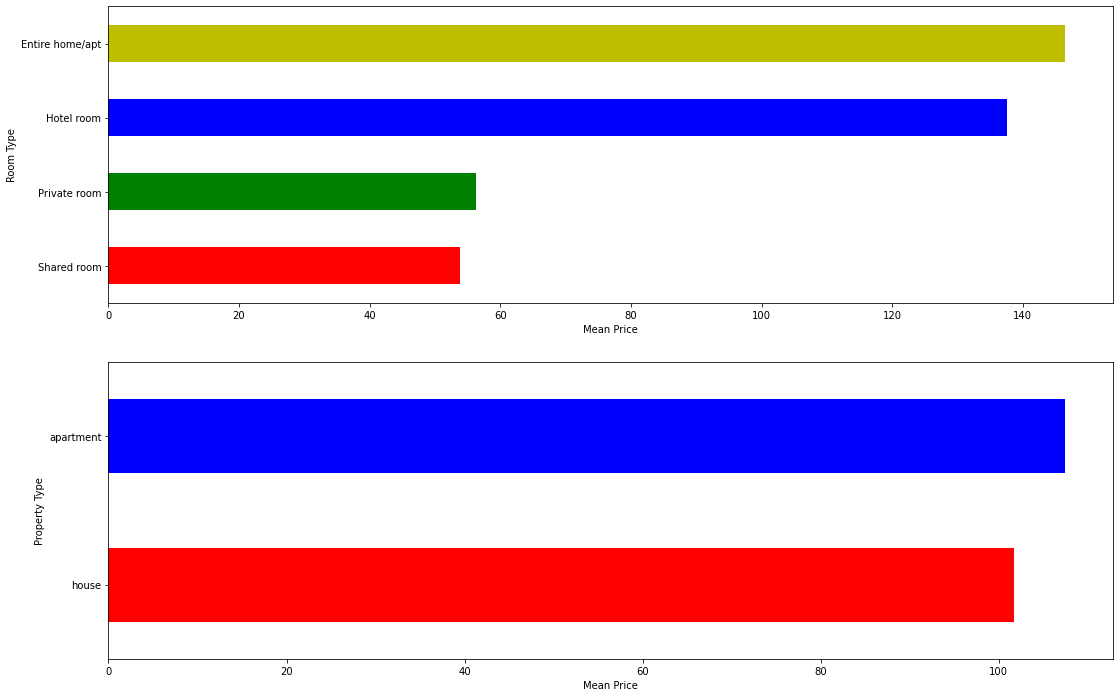

In [8]:
fig,ax = plt.subplots(2, figsize = (18,12))

df_vis.groupby('room_type').mean()['price'].sort_values().plot.barh(ax=ax[0], ylabel='Room Type',
                                                                      color = ['r','g','b','y'])
df_vis.groupby('property_type_basic').mean()['price'].sort_values().plot.barh(ax=ax[1], ylabel='Property Type',
                                                                               color = ['r', 'b'])

ax[0].set_ylabel('Room Type')
ax[1].set_ylabel('Property Type')

ax[0].set_xlabel('Mean Price')
ax[1].set_xlabel('Mean Price')

plt.show()

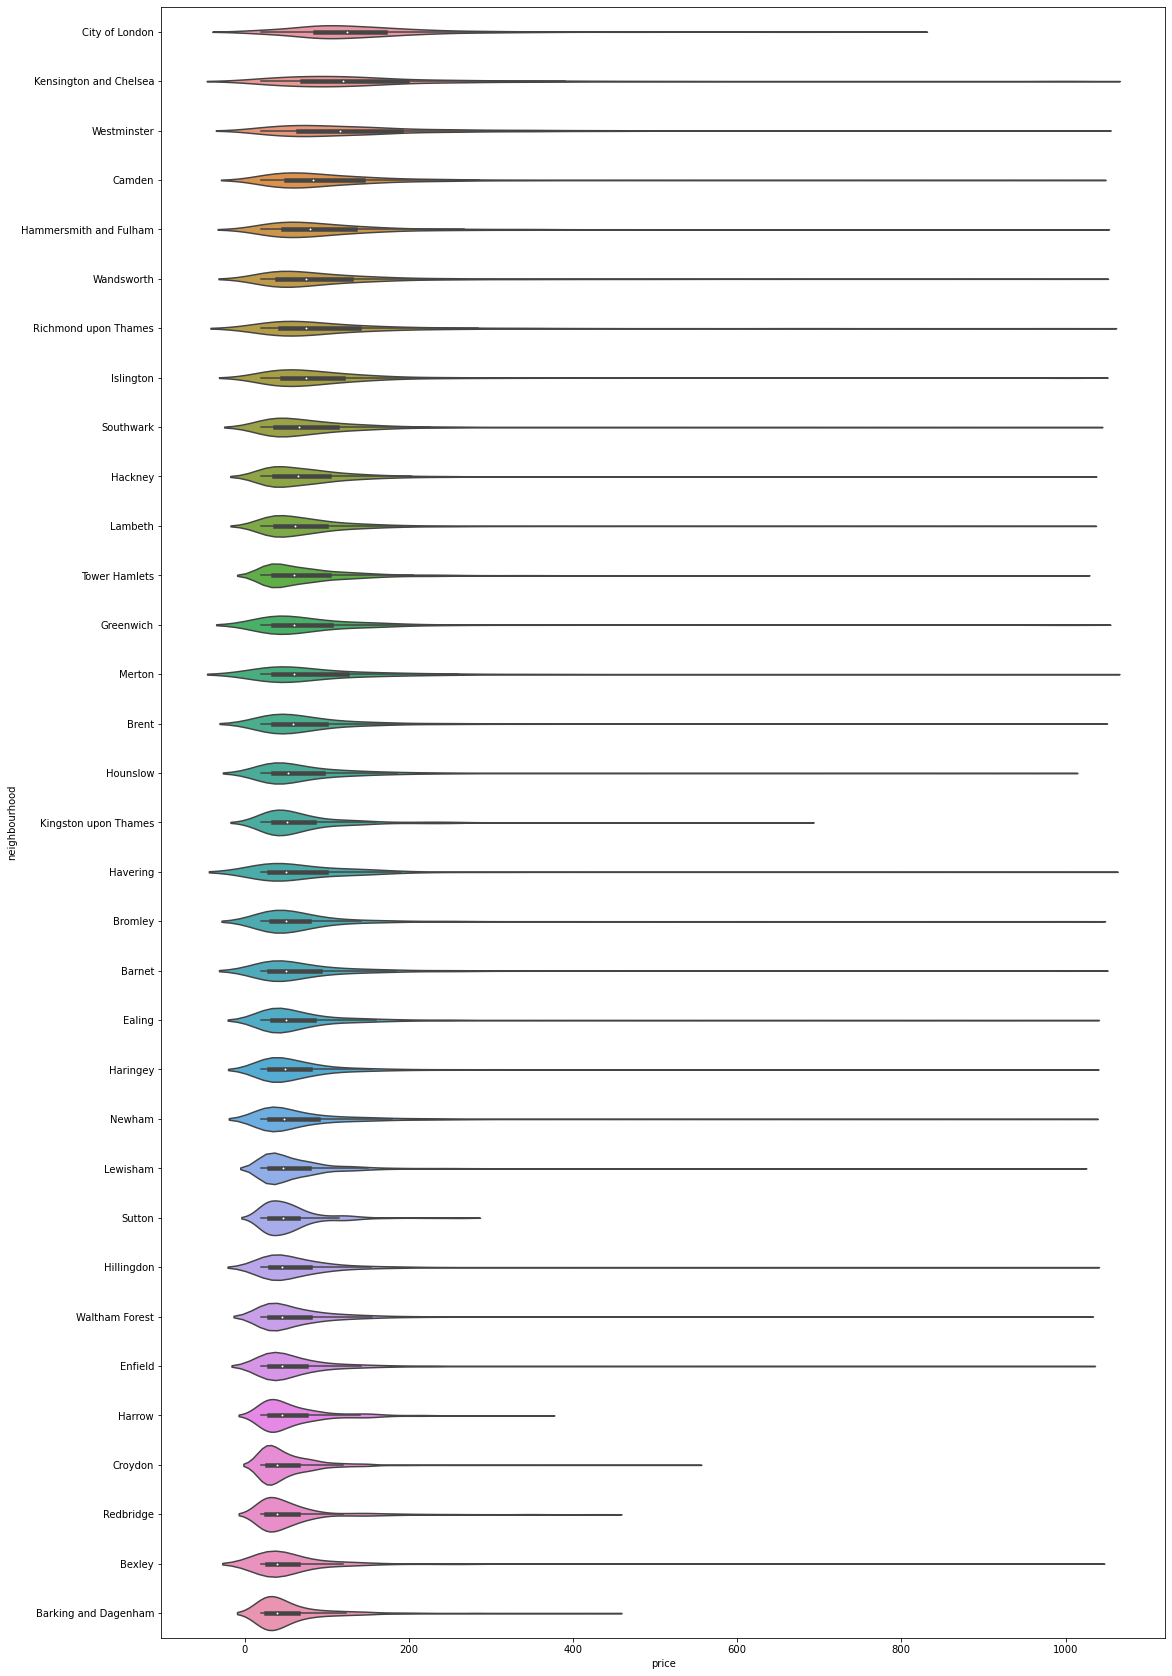

In [9]:
fig,ax = plt.subplots(figsize=(18,30))

neighbourhood_order = df_vis.groupby('neighbourhood').median()['price'].sort_values(ascending=False).index

sns.violinplot(x=df_vis.price,y=df_vis.neighbourhood,order = neighbourhood_order, ax=ax)

plt.show()

In [10]:
df_vis['tfl_zone_object'] = df_vis.tfl_zone.astype('object')

In [11]:
df_vis['tfl_zone_object'] = df_vis.tfl_zone_object.apply(lambda x: 'Zone ' + str(x))

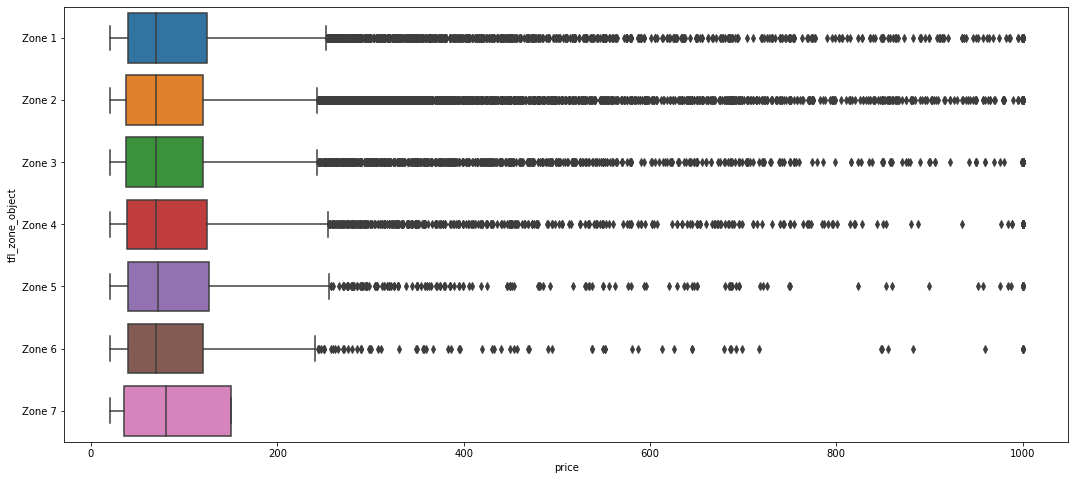

In [12]:
fig,ax = plt.subplots(figsize=(18,8))

tfl_order = sorted(df_vis.tfl_zone_object.unique())

sns.boxplot(x='price', y='tfl_zone_object', data=df_vis, order=tfl_order)

plt.show()

## GeoPandas

In [13]:
map_df_vis = gpd.read_file('../data/neighbourhoods.geojson')
map_df_vis.head()

neighbourhood neighbourhood_group  \
0  Kingston upon Thames                None   
1               Croydon                None   
2               Bromley                None   
3              Hounslow                None   
4                Ealing                None   

                                            geometry  
0  MULTIPOLYGON (((-0.33068 51.32901, -0.33059 51...  
1  MULTIPOLYGON (((-0.06402 51.31864, -0.06407 51...  
2  MULTIPOLYGON (((0.01213 51.29960, 0.01196 51.2...  
3  MULTIPOLYGON (((-0.24456 51.48870, -0.24468 51...  
4  MULTIPOLYGON (((-0.41183 51.53408, -0.41188 51...

In [14]:
# Dropping the empty column
map_df_vis.drop('neighbourhood_group', axis=1, inplace=True)

# Creating a dataframe of listing counts and median price by borough
neighbourhood_df_vis = pd.DataFrame(df_vis.groupby('neighbourhood').size())
neighbourhood_df_vis.rename(columns={0: 'number_of_listings'}, inplace=True)
neighbourhood_df_vis['median_price'] = df_vis.groupby('neighbourhood').price.median().values

# Joining the dataframes
neighbourhood_map_df_vis = map_df_vis.set_index('neighbourhood').join(neighbourhood_df_vis)

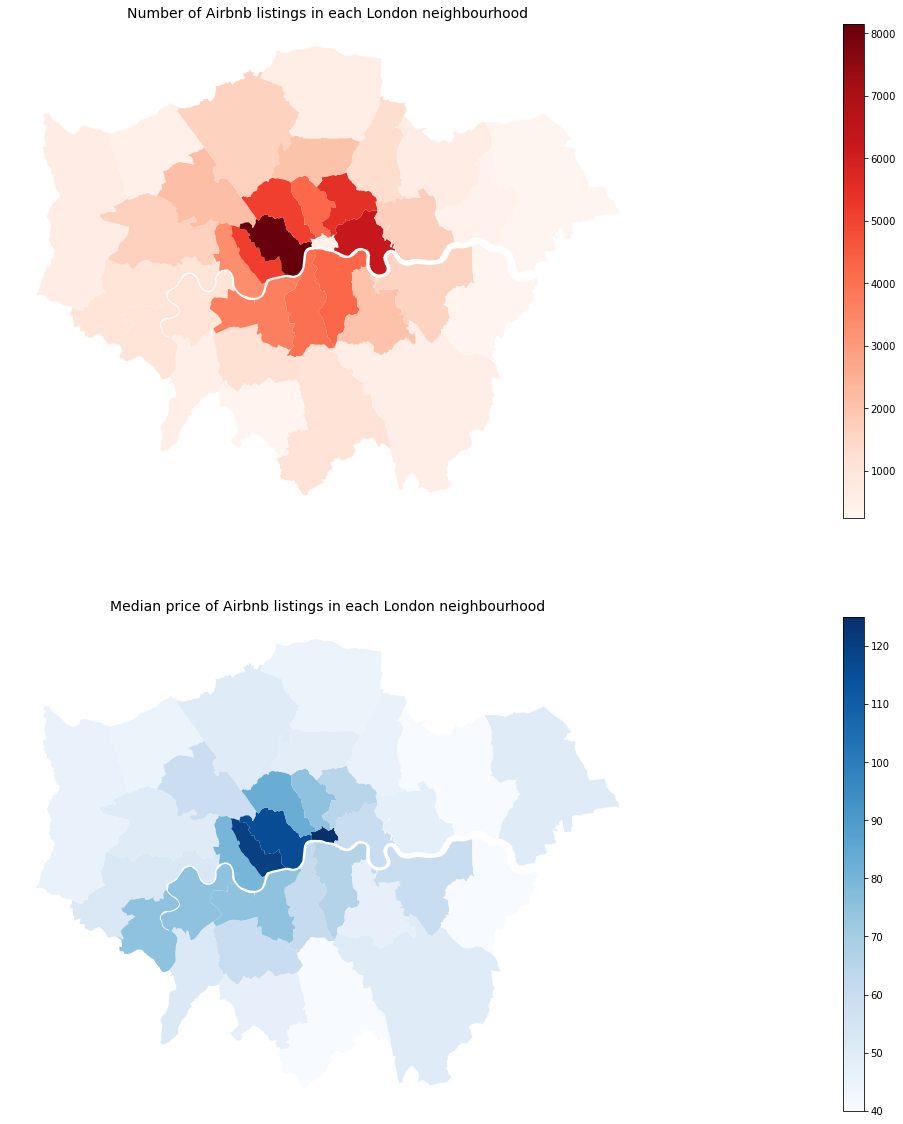

In [15]:
# Plotting the number of listings in each borough
fig, ax = plt.subplots(2,1, figsize=(20, 20))

divider0 = make_axes_locatable(ax[0])
cax0 = divider0.append_axes("right", size="2%", pad=0)

neighbourhood_map_df_vis.plot(column='number_of_listings', cmap='Reds', ax=ax[0], legend=True, cax=cax0)
ax[0].axis('off')
ax[0].set_title('Number of Airbnb listings in each London neighbourhood', fontsize=14)

divider1 = make_axes_locatable(ax[1])
cax1 = divider1.append_axes("right", size="2%", pad=0)

neighbourhood_map_df_vis.plot(column='median_price', cmap='Blues', ax=ax[1], legend=True, cax=cax1)
ax[1].axis('off')
ax[1].set_title('Median price of Airbnb listings in each London neighbourhood', fontsize=14)

plt.show()

In [106]:
neighbourhood_df_vis['house_ratio'] = df_vis.groupby('neighbourhood')['property_type_basic'].value_counts(normalize='all').unstack()['house']

In [111]:
house_ratio = df_vis.groupby('neighbourhood')['property_type_basic'].value_counts(normalize='all').unstack()['house']

In [115]:
neighbourhood_map_df_vis = neighbourhood_map_df_vis.join(house_ratio, how='left')

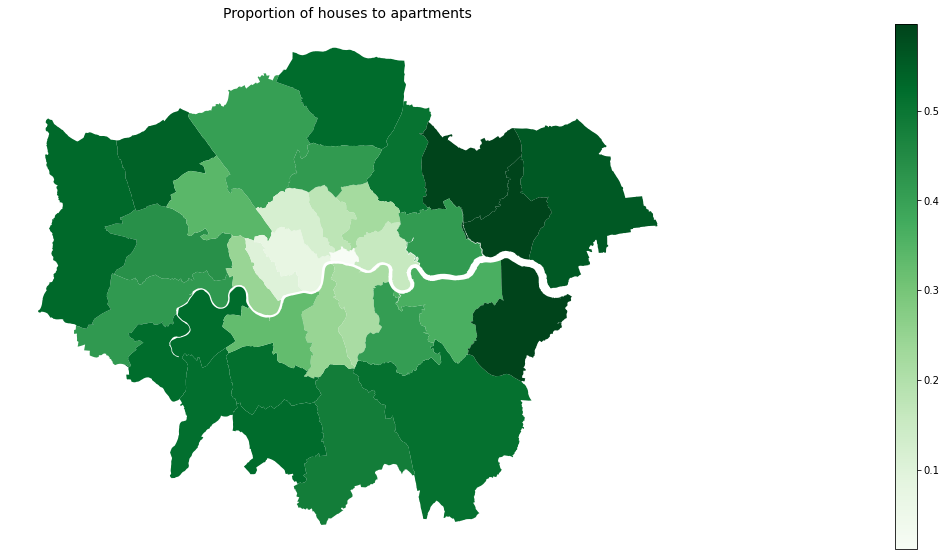

In [124]:
fig,ax = plt.subplots(figsize=(20,10))

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2%", pad=0)

neighbourhood_map_df_vis.plot(column='house', cmap='Greens', ax=ax, legend=True, cax=cax)
ax.axis('off')
ax.set_title('Proportion of houses to apartments', fontsize=14)

plt.show()

credit for the code above to https://github.com/L-Lewis/Airbnb-neural-network-price-prediction/blob/master/Airbnb-price-prediction.ipynb

Median Price Comparision for binary variables

In [16]:
amenities_variables = ['air_conditioning', 'bbq', 'baby_facilities', 'balcony_or_patio',
                       'bath', 'bed_linen', 'cable_tv', 'child_friendly', 'coffee_maker',
                       'cooking_facilities', 'dishwasher', 'fridge_freezer', 'garden', 
                       'has_workspace', 'host_greets_you', 'long_term_stays', 'luggage_dropoff',
                       'lock_on_bedroom_door', 'luxury_facilities', 'private_entrance',
                       'toiletries', 'tumble_dryer', 'tv']

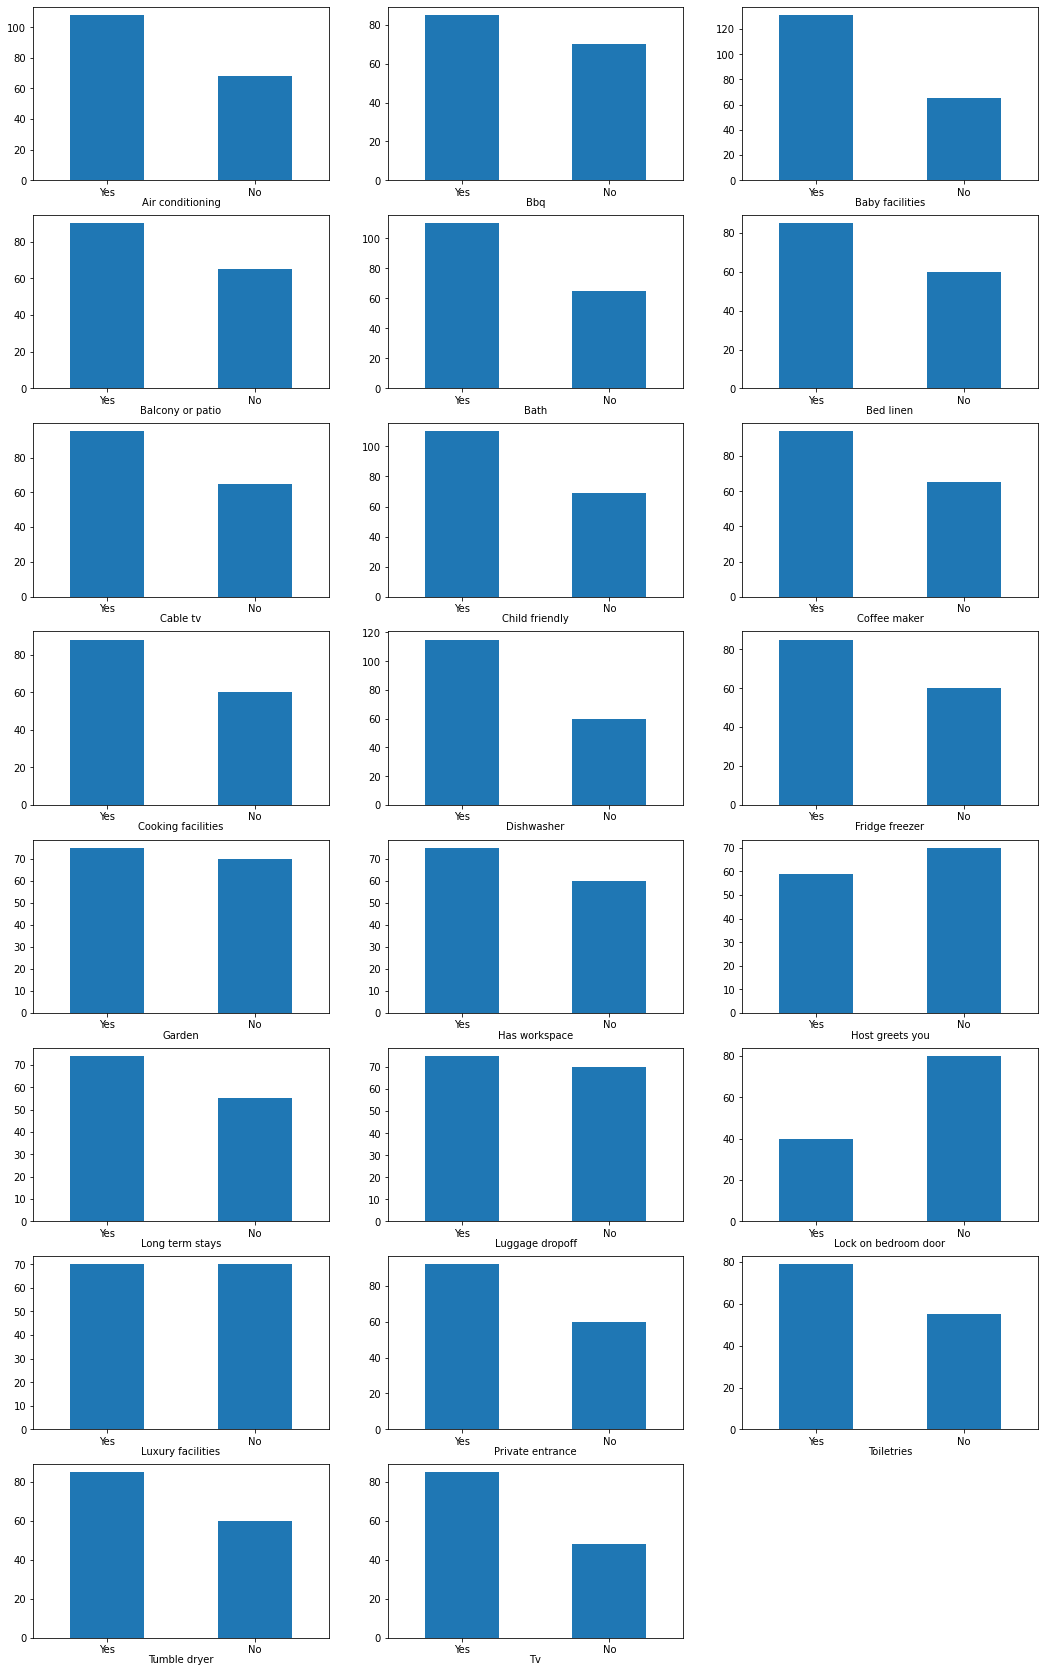

In [30]:
fig,ax = plt.subplots(8, 3, figsize=(18,30))

for ax_, amenity in zip(ax.flatten(), amenities_variables):
    
    x_label = amenity.replace('_', ' ').capitalize()
    
    df_vis.groupby(amenity).median()['price'].sort_index(ascending=False).plot.bar(ax=ax_)
    ax_.set_xticklabels(labels=['Yes', 'No'], rotation=0)
    ax_.set_xlabel(x_label, labelpad=0.2)

fig.delaxes(ax[7,2])    
plt.show()

In [35]:
variables_continuous = ['accommodates', 'bathrooms', 'bedrooms', 'beds', 'calculated_host_listings_count', 
                        'distance_from_center', 'station_distance', 'mean_monthly_rent',
                        'name_length', 'description_length', 'neighborhood_overview_length', 'host_about_length']

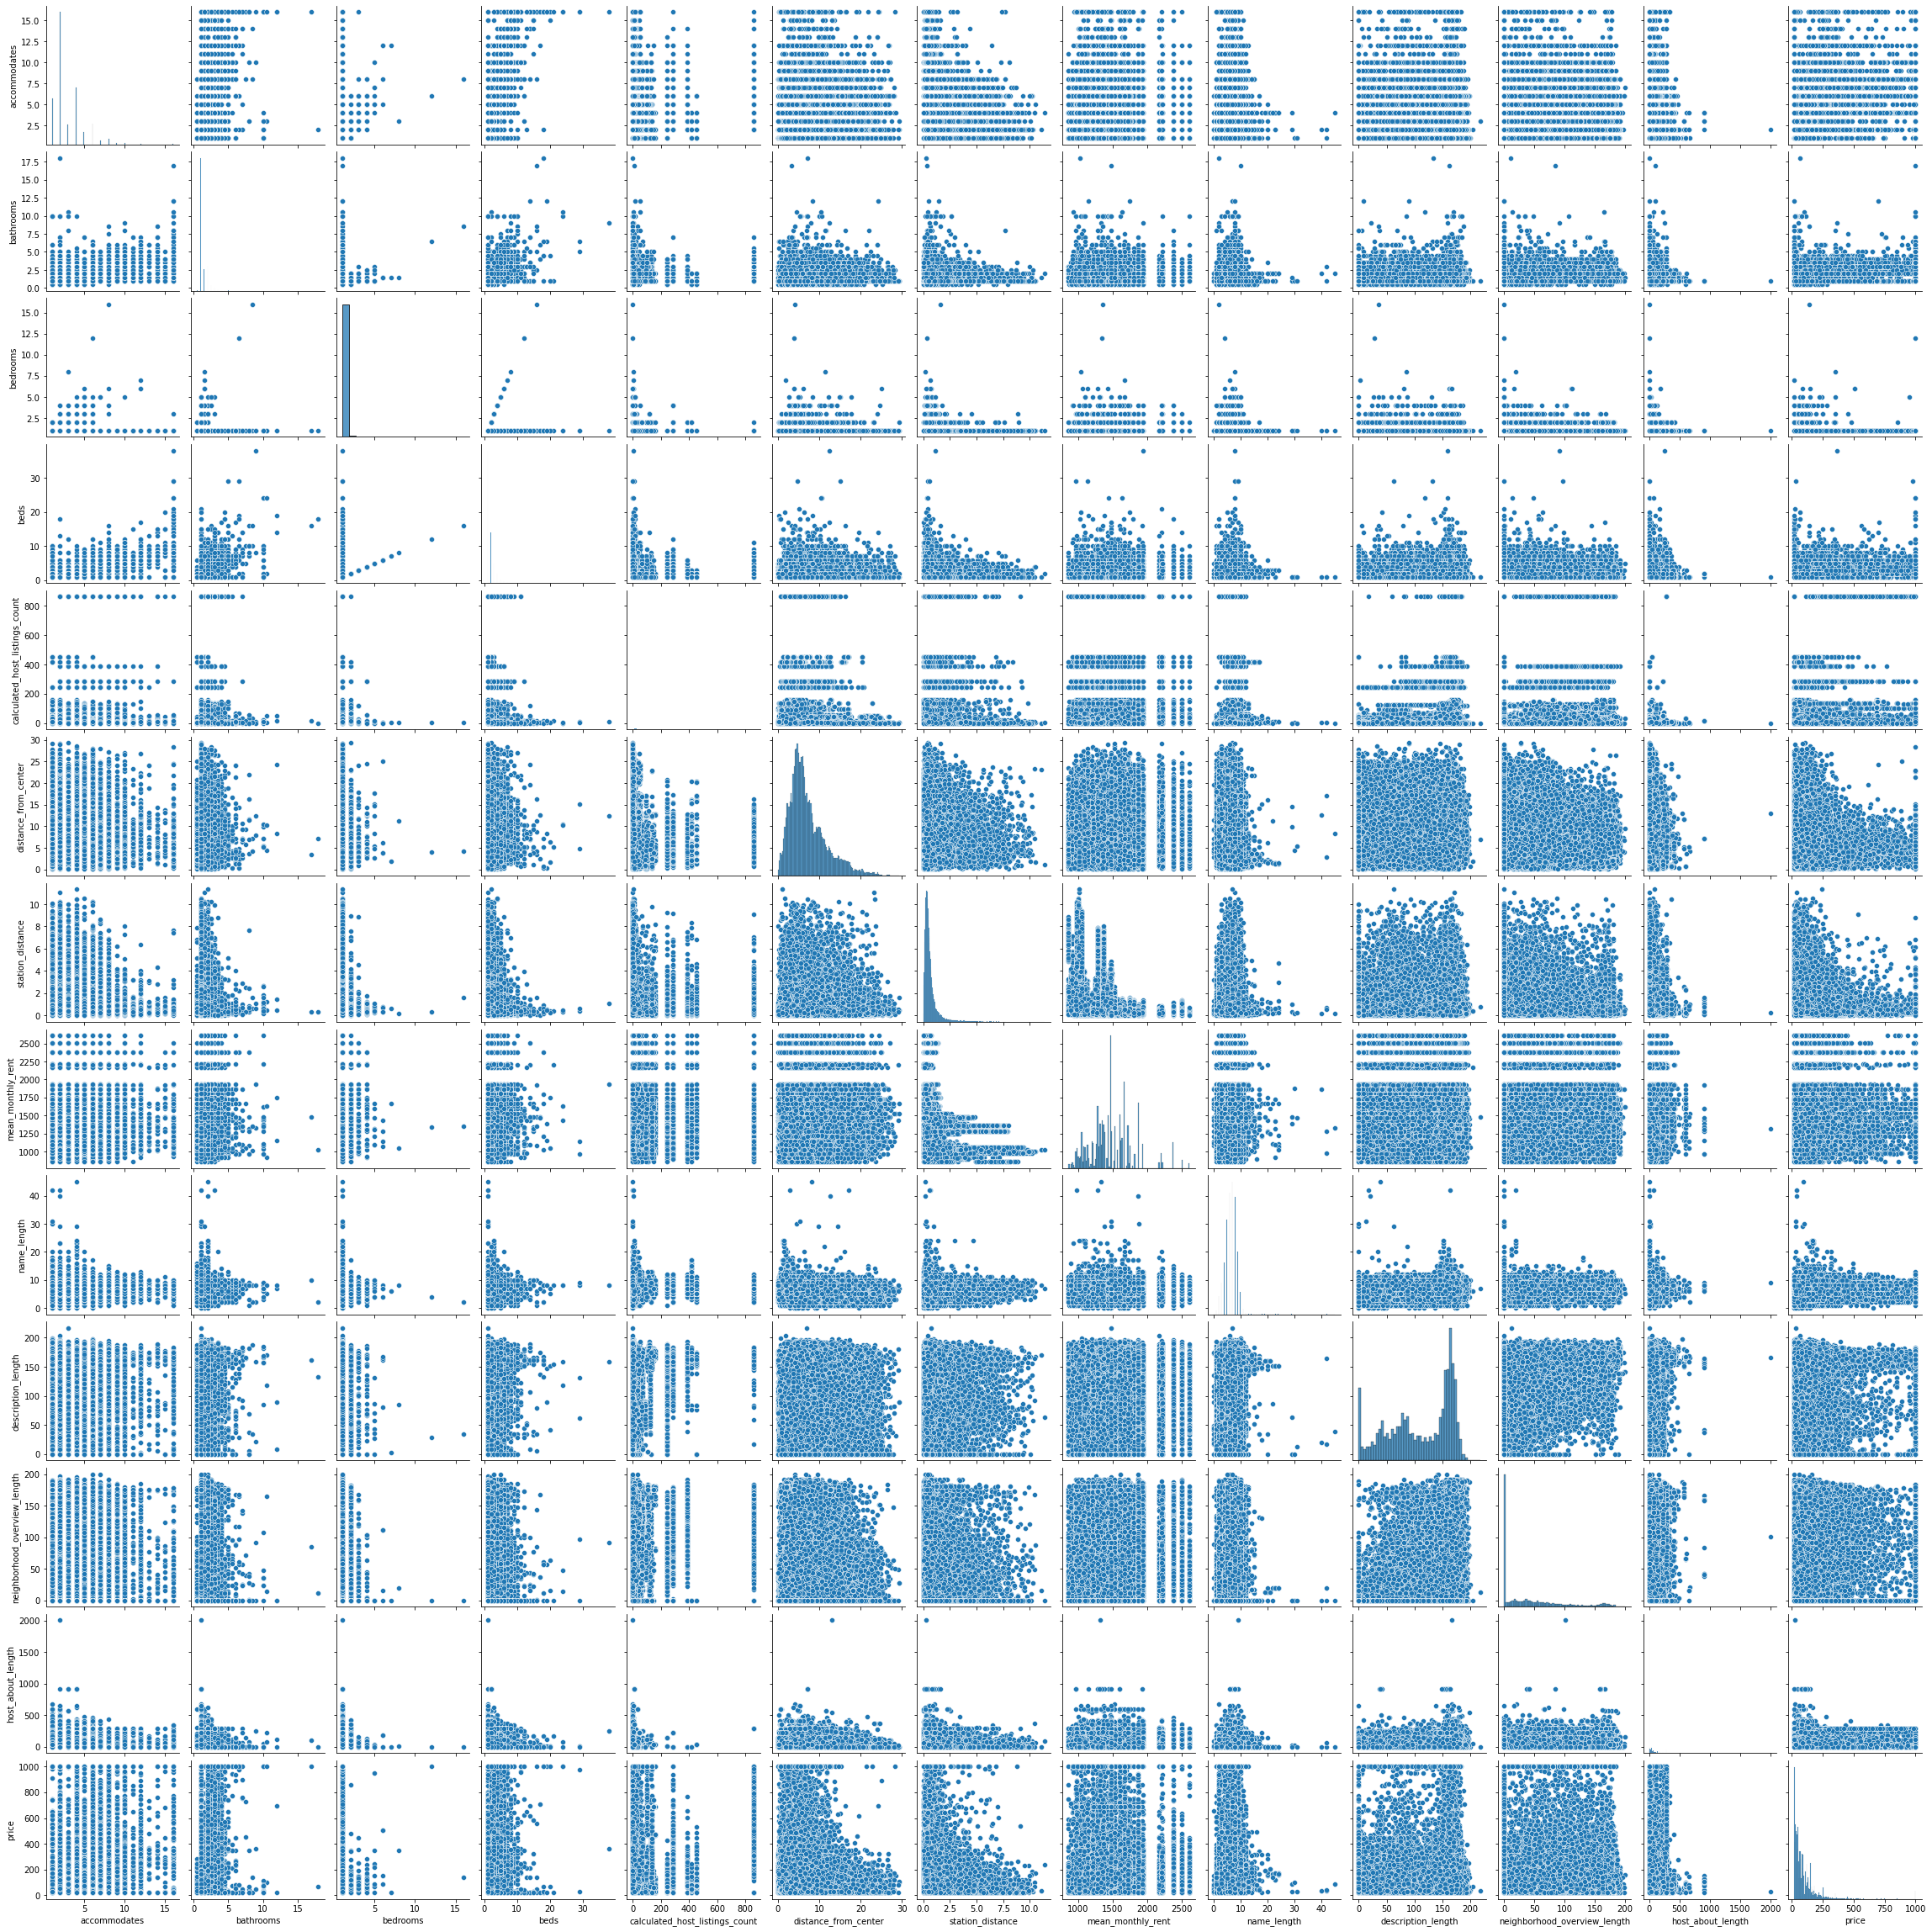

In [90]:
pp = sns.pairplot(df_vis[variables_continuous+['price']])

In [134]:
quantitative_property = ['accommodates', 'bathrooms', 'bedrooms', 'beds',
                         'distance_from_center', 'station_distance', 'mean_monthly_rent']

quantitative_listing = ['calculated_host_listings_count', 'name_length',
                       'description_length', 'neighborhood_overview_length', 'host_about_length']

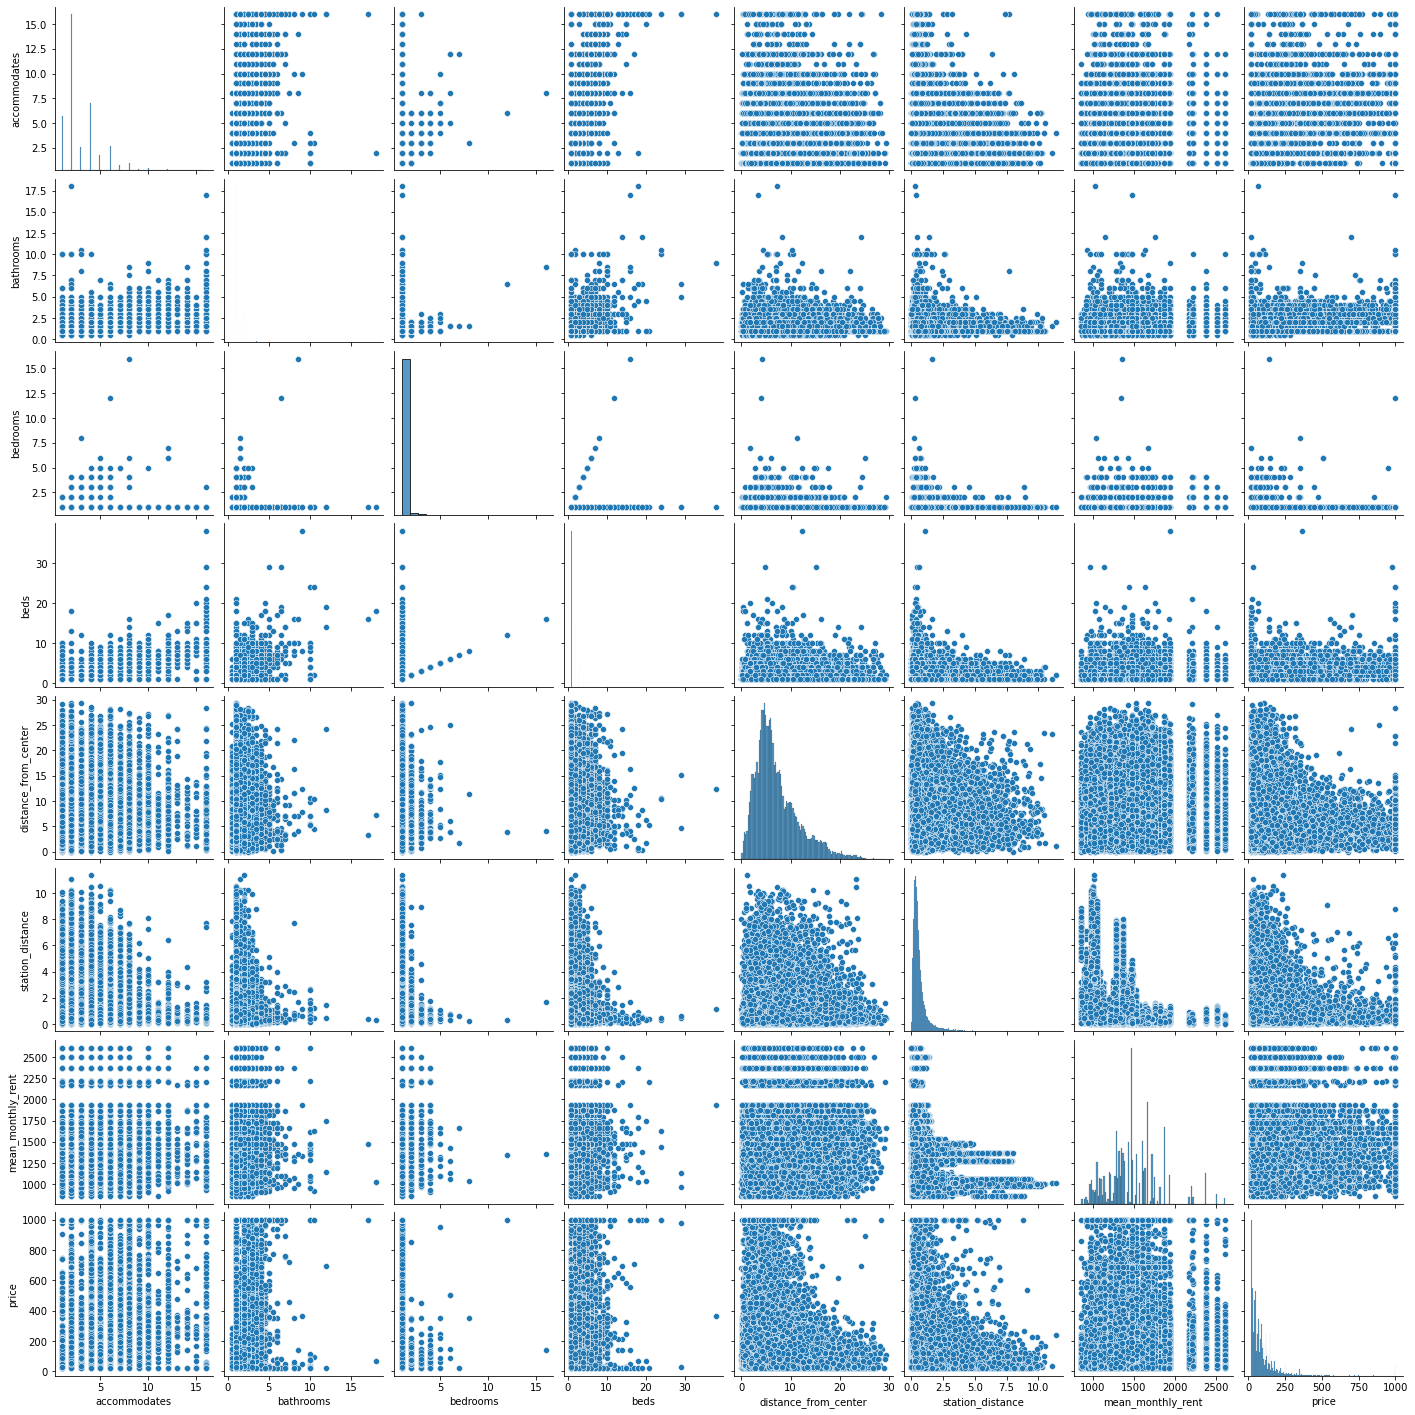

In [136]:
sns.pairplot(df_vis[quantitative_property +['price']])

plt.show()

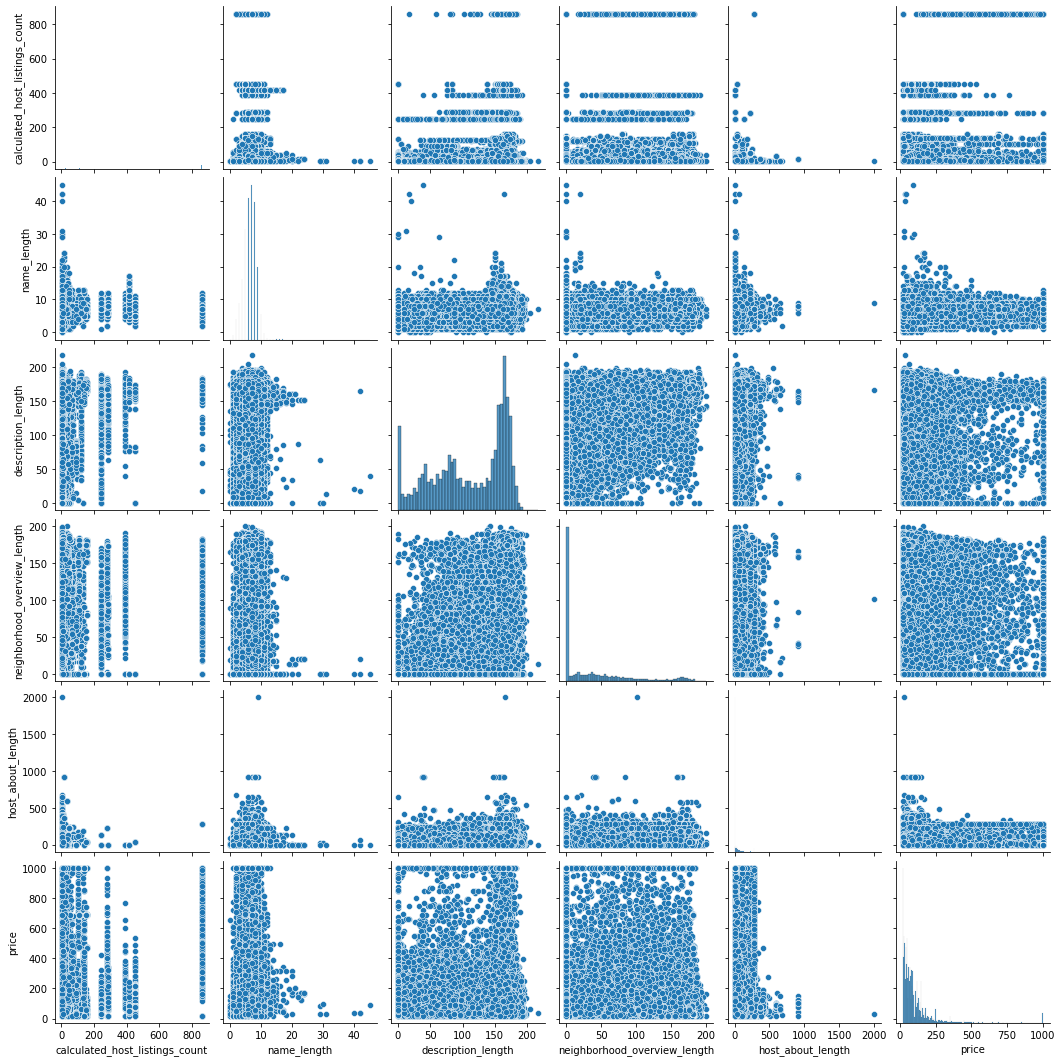

In [138]:
sns.pairplot(df_vis[quantitative_listing +['price']])

plt.show()

In [45]:
mask = np.zeros_like(df.corr())

mask[np.triu_indices_from(mask)] = True

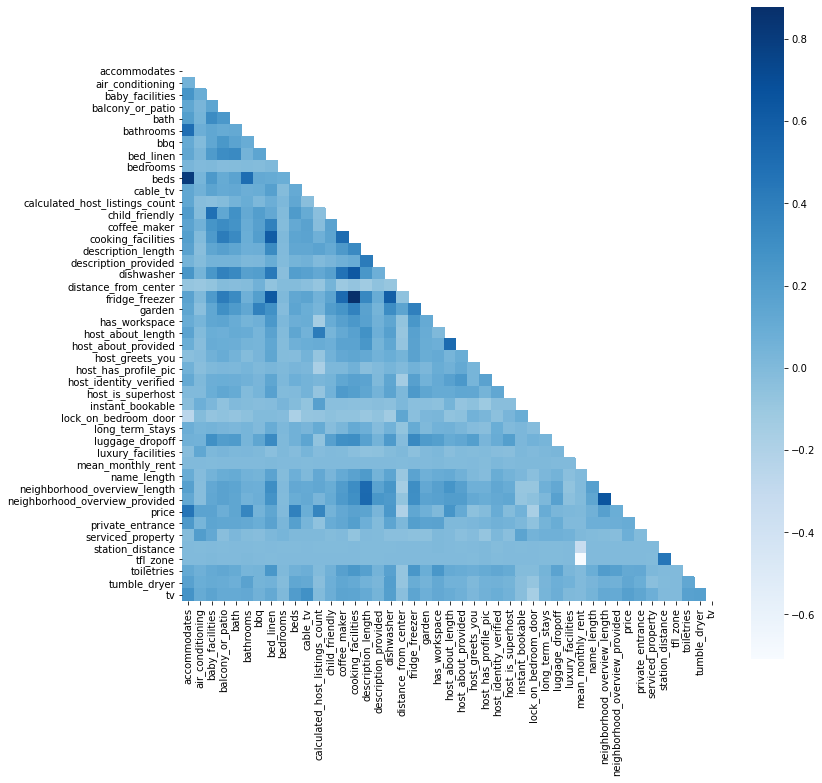

In [53]:
plt.figure(figsize=(12,12))


sns.heatmap(df.reindex(sorted(df.columns), axis=1).corr(), mask=mask,square=True, cmap='Blues')

plt.show()